In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [9]:
def save_png():
    pass



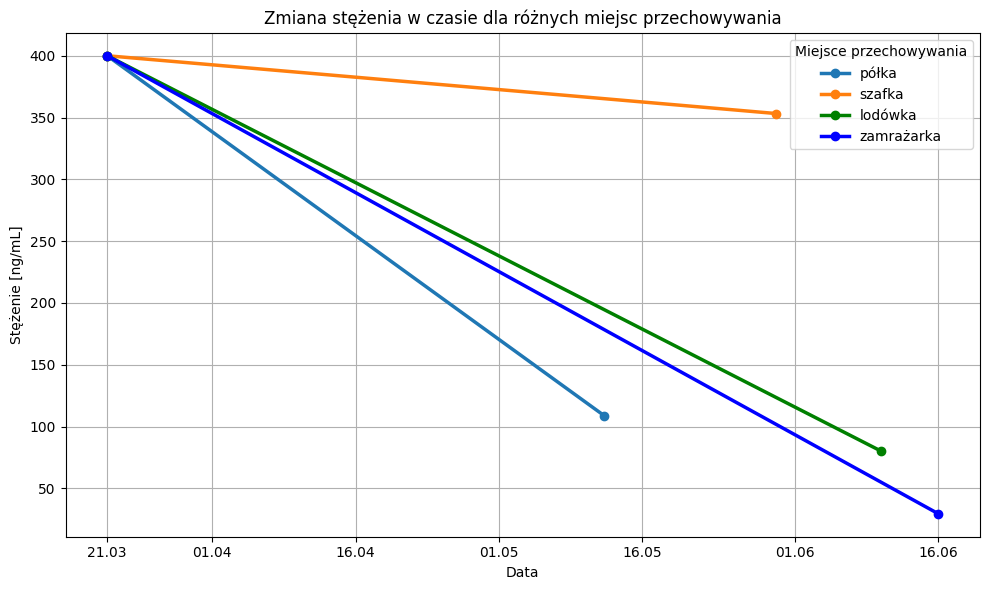

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# ───────────────────────────────────────────────────────────────────────────────
# Data – (place, date-string dd.mm.yyyy, concentration)
# ───────────────────────────────────────────────────────────────────────────────
records = [
    ("półka",      "21.03.2025", 400),
    ("półka",      "12.05.2025", 108.92),
    ("szafka",     "21.03.2025", 400),
    ("szafka",     "30.05.2025", 353.25),
    ("lodówka",    "21.03.2025", 400),
    ("lodówka",    "10.06.2025", 80.13),
    ("zamrażarka", "21.03.2025", 400),
    ("zamrażarka", "16.06.2025", 29.41),
]

# ───────────────────────────────────────────────────────────────────────────────
# Build a dict: {place: [(date, value), ...]}
# ───────────────────────────────────────────────────────────────────────────────
data_by_place = {}
for place, date_str, value in records:
    dt = datetime.strptime(date_str, "%d.%m.%Y")
    data_by_place.setdefault(place, []).append((dt, value))

# ───────────────────────────────────────────────────────────────────────────────
# Plot
# ───────────────────────────────────────────────────────────────────────────────
colors = {"lodówka": "green", "zamrażarka": "blue"}

plt.figure(figsize=(10, 6))

for place, pairs in data_by_place.items():
    pairs.sort(key=lambda x: x[0])
    dates, values = zip(*pairs)
    plt.plot(
        dates, values,
        marker="o",
        linewidth=2.5,
        label=place,
        color=colors.get(place)           # default colour if not in dict
    )

plt.xlabel("Data")
plt.ylabel("Stężenie [ng/mL]")
plt.title("Zmiana stężenia w czasie dla różnych miejsc przechowywania")
plt.legend(title="Miejsce przechowywania")
plt.grid(True)

# ───────────────────────────────────────────────────────────────────────────────
# Custom, evenly-spaced tick list: 21 Mar → 16 Jun
# ───────────────────────────────────────────────────────────────────────────────
ticks = [datetime(2025, 3, 21)] + [
    datetime(2025, m, d)
    for m in (4, 5, 6)          # April, May, June
    for d in (1, 16)            # 1st and 16th of each month
]
ticks.sort()                    # keep chronological order

ax = plt.gca()
ax.set_xticks(ticks) # type: ignore
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

plt.tight_layout()
plt.show()
plt.savefig("images/Stezenie1.png")
